In [1]:
import numpy as np
import matplotlib.pyplot as plt

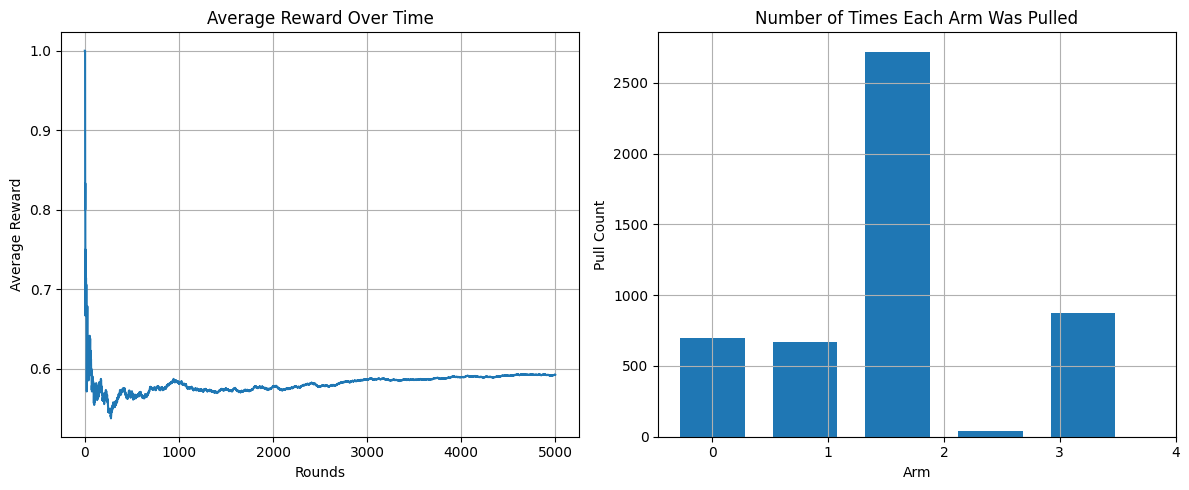

[1, 3, 4, 2, 3, 1, 1, 2, 3, 4, 2, 2, 4, 4, 3, 4, 4, 4, 4, 4, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 4, 4, 1, 2, 4, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 4, 1, 4, 2, 1, 0, 0, 4, 0, 0, 0, 4, 2, 2, 1, 1, 0, 2, 4, 0, 4, 1, 4, 0, 4, 1, 4, 4, 0, 1, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 1, 1, 4, 0, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 0, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 4, 2, 0, 4, 1, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 0, 1, 1, 4, 1, 4, 1, 1, 4, 3, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 0, 0, 1, 4, 4, 1, 0, 1, 0, 4, 0, 1, 4, 1, 0, 0, 0, 4, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 4, 1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 4, 4, 4, 4, 4, 1, 0, 2, 1, 0, 4, 4, 2, 4, 4, 0, 4, 1, 3, 1, 4, 4, 4, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 4, 0, 4, 1, 4, 1, 1, 4, 1, 1, 4, 0, 0, 1, 4, 4, 1, 4, 1, 4, 0, 0, 4, 4, 4, 4, 1, 4, 4, 1, 1, 0, 1, 1, 1, 1, 4, 0, 4, 4, 4, 1, 0, 0, 4, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 4, 4, 1, 0, 

In [28]:
# Bandit Environment
class BanditGame:
    def __init__(self, arm_probabilities):
        self.probs = arm_probabilities
        self.n_arms = len(arm_probabilities)

    def pull(self, arm):
        return 1 if np.random.rand() < self.probs[arm] else 0

# Thompson Sampling Agent
class ThompsonSamplingAgent:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.successes = np.zeros(n_arms)
        self.failures = np.zeros(n_arms)

    def select_arm(self):
        samples = [np.random.beta(self.successes[i]+1, self.failures[i]+1) for i in range(self.n_arms)]
        return np.argmax(samples)

    def update(self, arm, reward):
        if reward == 1:
            self.successes[arm] += 1
        else:
            self.failures[arm] += 1

# Run the game
def play_game(arm_probabilities, rounds=1000):
    env = BanditGame(arm_probabilities)
    agent = ThompsonSamplingAgent(len(arm_probabilities))
    
    rewards = []
    choices = []

    for _ in range(rounds):
        arm = agent.select_arm()
        reward = env.pull(arm)
        agent.update(arm, reward)
        rewards.append(reward)
        choices.append(arm)

    return rewards, choices

# Settings
# true_probabilities = [0.38, 0.45, 0.63, 0.52, 0.58]  # True (hidden) reward probabilities
true_probabilities = [0.57, 0.57, 0.59, 0.57, 0.57]  # True (hidden) reward probabilities
rounds = 5000

# Run
rewards, choices = play_game(true_probabilities, rounds)
cumulative_average = np.cumsum(rewards) / (np.arange(rounds) + 1)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cumulative_average)
plt.title("Average Reward Over Time")
plt.xlabel("Rounds")
plt.ylabel("Average Reward")
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(choices, bins=len(true_probabilities), rwidth=0.7, align='left')
plt.title("Number of Times Each Arm Was Pulled")
plt.xlabel("Arm")
plt.ylabel("Pull Count")
plt.xticks(range(len(true_probabilities)))
plt.grid()

plt.tight_layout()
plt.show()

print(choices)


Beta Distribution

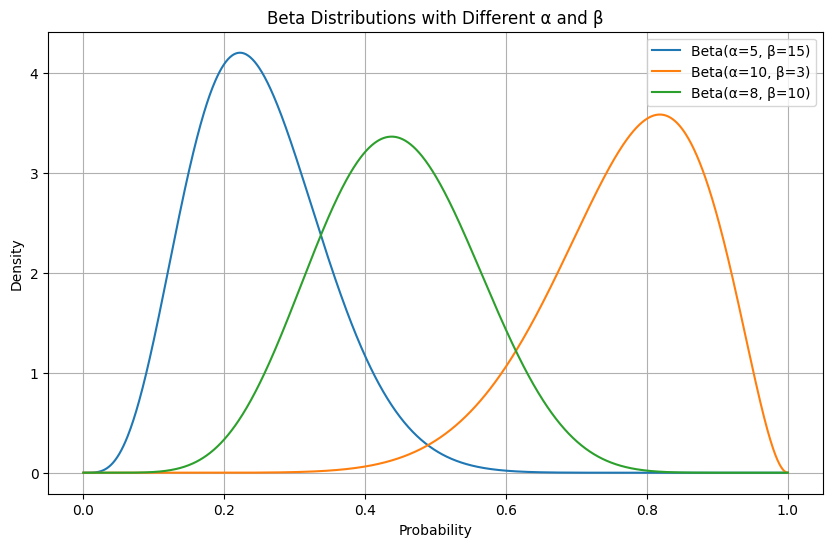

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_beta_distributions(params):
    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(10, 6))
    
    for a, b in params:
        y = beta.pdf(x, a, b)
        plt.plot(x, y, label=f'Beta(α={a}, β={b})')
    
    plt.title('Beta Distributions with Different α and β')
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Try different values of alpha and beta here
# beta_params = [
#     (1, 1),   # Uniform
#     (2, 2),   # Wide peak around 0.5
#     (5, 1),   # Skewed towards 1 (many successes)
#     (1, 5),   # Skewed towards 0 (many failures)
#     (10, 10), # Tight peak around 0.5
#     (20, 5),  # Strong skew towards 1
# ]

beta_params = [
    (5, 15),   # Uniform
    (10, 3),   # Wide peak around 0.5
    (8, 10),   # Skewed towards 1 (many successes)
]

plot_beta_distributions(beta_params)
